In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import pickle

In [3]:
data_ipl=pd.read_csv("ipl.csv")

In [4]:
data_ipl

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [5]:
data_ipl.head(200)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Kings XI Punjab,SK Raina,K Goel,124,3,11.4,64,1,48,31,240
196,2,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Kings XI Punjab,SK Raina,K Goel,125,3,11.5,64,1,48,32,240
197,2,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Kings XI Punjab,MEK Hussey,K Goel,127,3,11.6,65,1,50,32,240
198,2,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Kings XI Punjab,SK Raina,WA Mota,128,3,12.0,66,0,50,32,240


In [6]:
data_ipl['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [7]:
not_a_venue=['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Maharashtra Cricket Association Stadium',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Saurashtra Cricket Association Stadium', 'Green Park']

In [8]:
data_ipl=data_ipl[data_ipl['venue'].isin(not_a_venue)]

In [9]:
len(data_ipl)

67925

In [10]:
columns_to_drop=['mid', 'batsman', 'bowler', 'striker', 'non-striker']

In [11]:
data_ipl=data_ipl.drop(labels=columns_to_drop,axis=1)

In [12]:
data_ipl.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [13]:
consistent_teams=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                      'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',   'Delhi Daredevils', 'Sunrisers Hyderabad']

In [14]:
data_ipl=data_ipl[(data_ipl['bat_team'].isin(consistent_teams))&(data_ipl['bowl_team'].isin(consistent_teams))]

In [15]:
data_ipl['date']=data_ipl['date'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d"))

In [16]:
data_ipl.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


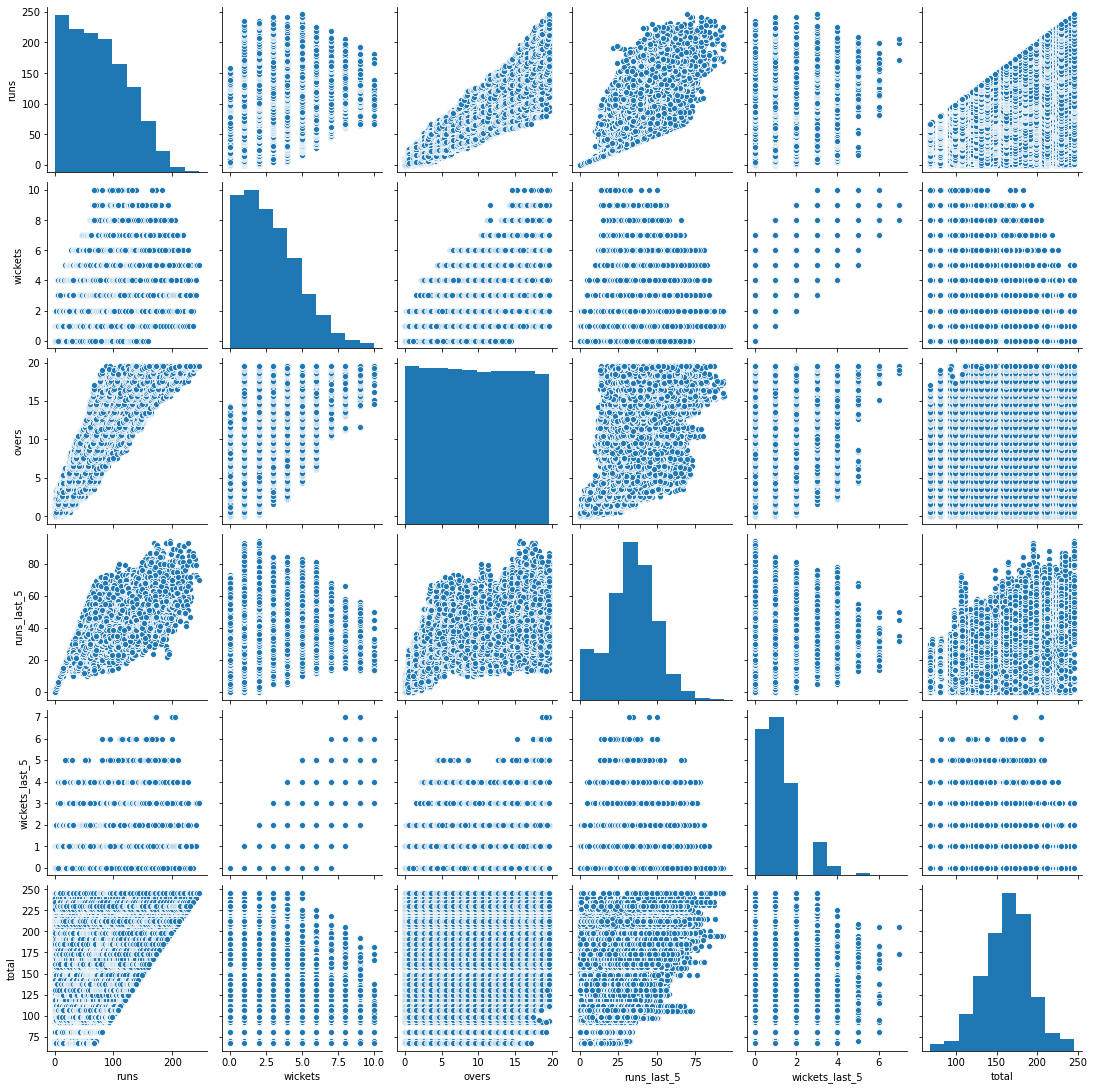

In [17]:
sns.pairplot(data_ipl)

In [18]:
ipl=pd.get_dummies(data=data_ipl,columns=['bat_team','bowl_team','venue'])

In [19]:
ipl.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue_Barabati Stadium,venue_Dr DY Patil Sports Academy,venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,venue_Dubai International Cricket Stadium,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_Himachal Pradesh Cricket Association Stadium,venue_Holkar Cricket Stadium,venue_JSCA International Stadium Complex,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk",venue_Maharashtra Cricket Association Stadium,"venue_Punjab Cricket Association IS Bindra Stadium, Mohali","venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal","venue_Sardar Patel Stadium, Motera",venue_Sawai Mansingh Stadium,venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_Subrata Roy Sahara Stadium,venue_Wankhede Stadium
0,2008-04-18,1,0,0.1,1,0,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2008-04-18,1,0,0.2,1,0,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2008-04-18,2,0,0.2,2,0,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2008-04-18,2,0,0.3,2,0,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2008-04-18,2,0,0.4,2,0,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
ipl=ipl[['date','venue_Barabati Stadium',	'venue_Dr DY Patil Sports Academy',	'venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',	'venue_Dubai International Cricket Stadium',	'venue_Eden Gardens',	'venue_Feroz Shah Kotla',	'venue_Himachal Pradesh Cricket Association Stadium',	'venue_Holkar Cricket Stadium',	'venue_JSCA International Stadium Complex',	'venue_M Chinnaswamy Stadium',	'venue_MA Chidambaram Stadium, Chepauk'	,'venue_Maharashtra Cricket Association Stadium'	,'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',	'venue_Punjab Cricket Association Stadium, Mohali'	,'venue_Rajiv Gandhi International Stadium, Uppal',	'venue_Sardar Patel Stadium, Motera'	,'venue_Sawai Mansingh Stadium'	,'venue_Shaheed Veer Narayan Singh International Stadium',	'venue_Sharjah Cricket Stadium',	'venue_Sheikh Zayed Stadium',	'venue_Subrata Roy Sahara Stadium',	'venue_Wankhede Stadium','bat_team_Chennai Super Kings',	'bat_team_Delhi Daredevils',	'bat_team_Kings XI Punjab',	'bat_team_Kolkata Knight Riders',	'bat_team_Mumbai Indians',	'bat_team_Rajasthan Royals',	'bat_team_Royal Challengers Bangalore',	'bat_team_Sunrisers Hyderabad','bowl_team_Chennai Super Kings',	'bowl_team_Delhi Daredevils',	'bowl_team_Kings XI Punjab',	'bowl_team_Kolkata Knight Riders'	,'bowl_team_Mumbai Indians','bowl_team_Rajasthan Royals',	'bowl_team_Royal Challengers Bangalore','bowl_team_Sunrisers Hyderabad','runs',	'wickets',	'overs',	'runs_last_5',	'wickets_last_5',	'total']]

In [21]:
ipl.head()

,date,venue_Barabati Stadium,venue_Dr DY Patil Sports Academy,venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,venue_Dubai International Cricket Stadium,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_Himachal Pradesh Cricket Association Stadium,venue_Holkar Cricket Stadium,venue_JSCA International Stadium Complex,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk",venue_Maharashtra Cricket Association Stadium,"venue_Punjab Cricket Association IS Bindra Stadium, Mohali","venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal","venue_Sardar Patel Stadium, Motera",venue_Sawai Mansingh Stadium,venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_Subrata Roy Sahara Stadium,venue_Wankhede Stadium,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.1,1,0,222
1,2008-04-18,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.2,1,0,222
2,2008-04-18,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0.2,2,0,222
3,2008-04-18,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0.3,2,0,222
4,2008-04-18,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0.4,2,0,222


In [22]:
X_train=ipl.drop(labels='total',axis=1)[ipl['date'].dt.year<=2016]
X_test=ipl.drop(labels='total',axis=1)[ipl['date'].dt.year>2016]

In [23]:
Y_train=ipl[ipl['date'].dt.year<=2016]['total'].values
Y_test=ipl[ipl['date'].dt.year>2016]['total'].values


In [24]:
X_train=X_train.drop(labels='date',axis=True)
X_test=X_test.drop(labels='date',axis=True)

In [ ]:
X_train.columns=['']*len(X_train.columns)

In [ ]:
X_train.index=['']*len(X_train.index)

In [ ]:
X_test.columns=['']*len(X_test.columns)
X_test.index=['']*len(X_test.index)

In [26]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(0.15),
                                    tf.keras.layers.Dense(64,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1)
])

In [27]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [28]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1379/1379 [==============================] - 10s 7ms/step - loss: 1455.8268
Epoch 2/300
1379/1379 [==============================] - 10s 7ms/step - loss: 554.4807
Epoch 3/300
1379/1379 [==============================] - 10s 7ms/step - loss: 423.8186
Epoch 4/300
1379/1379 [==============================] - 10s 7ms/step - loss: 326.2699
Epoch 5/300
1379/1379 [==============================] - 10s 7ms/step - loss: 274.9255
Epoch 6/300
1379/1379 [==============================] - 10s 7ms/step - 

In [41]:
my_prediction = model.predict(X_test)

In [44]:
for i in range(1000):
  print(Y_test[i])
  print(my_prediction[i])

207
[162.43564]
207
[162.86351]
207
[162.98802]
207
[162.74722]
207
[162.50827]
207
[162.94006]
207
[162.47507]
207
[163.53094]
207
[162.5529]
207
[162.52522]
207
[162.17253]
207
[101.89397]
207
[105.021805]
207
[103.390495]
207
[131.91104]
207
[153.29851]
207
[160.16214]
207
[145.54097]
207
[155.03862]
207
[159.81825]
207
[161.28291]
207
[161.37987]
207
[161.55428]
207
[161.64792]
207
[161.72694]
207
[161.78433]
207
[162.51582]
207
[162.549]
207
[162.57079]
207
[162.58508]
207
[162.41797]
207
[162.53183]
207
[162.97284]
207
[162.69731]
207
[162.92941]
207
[162.61513]
207
[162.45923]
207
[162.50786]
207
[162.96243]
207
[163.10886]
207
[163.19041]
207
[163.59409]
207
[163.56429]
207
[163.69638]
207
[163.81813]
207
[163.81314]
207
[163.80998]
207
[163.79921]
207
[163.83434]
207
[163.8568]
207
[163.75352]
207
[163.7777]
207
[163.72752]
207
[163.76134]
207
[163.7808]
207
[163.81718]
207
[163.6286]
207
[163.65433]
207
[163.69478]
207
[163.80374]
207
[163.94075]
207
[163.89842]
207
[163.7362

In [55]:
model.save('ipl_prediction.h5')